In [11]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

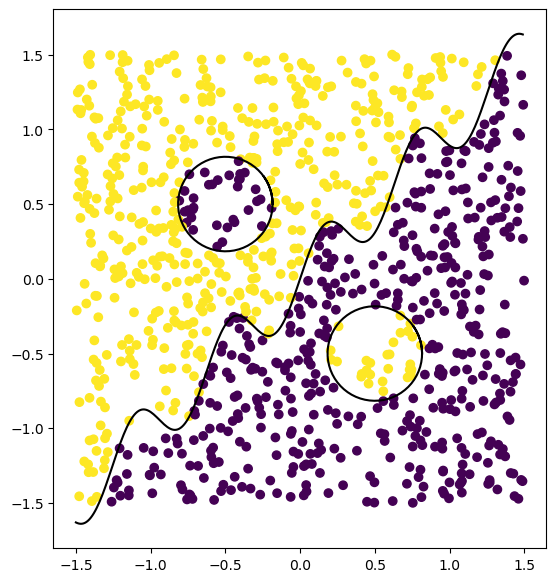

In [12]:
def con1(x,y):
    if y>=0.2*np.sin(10*x)+x:
        rv = 1
    else:
        rv = -1
    return rv

def con2(x,y):
    if (x+0.5)**2+(y-0.5)**2<= 0.1:
        rv = -2
    else:
        rv = 0
    return rv

def con3(x,y):
    if (x-0.5)**2+(y+0.5)**2<= 0.1:
        rv = 2
    else:
        rv = 0
    return rv

length=1000
xyset = 3.*(np.random.rand(length,2)-[0.5,0.5])
classes=[con1(xyset[i,0],xyset[i,1])+con2(xyset[i,0],xyset[i,1])+con3(xyset[i,0],xyset[i,1]) for i in range(len(xyset))]

# function that plots data with the true boundaries to axes

def plotTrueBoundaries(ax):
    phiRange = np.arange(0,7,0.1)
    xRange = np.arange(-1.5,1.5,0.01)
    x1 = -0.5 + np.sqrt(0.1)*np.cos(phiRange)
    y1 =  0.5 + np.sqrt(0.1)*np.sin(phiRange)
    x2 =  0.5 + np.sqrt(0.1)*np.cos(phiRange)
    y2 = -0.5 + np.sqrt(0.1)*np.sin(phiRange)
    y3 =  0.2*np.sin(10*xRange) + xRange
    ax.plot(x1, y1,'black')
    ax.plot(x2, y2,'black')
    ax.plot(xRange, y3,'black')


plt.figure(figsize = (7,7))
plt.scatter(xyset[:, 0], xyset[:, 1], c = classes)
plotTrueBoundaries(plt.gca())
plt.gca().set_aspect('equal')

In [13]:
def evaluateClassification(xyset, prediction, ax):
    ax.scatter(xyset[:, 0], xyset[:, 1], c = prediction)
    plotTrueBoundaries(ax)
    ax.set_title('Comparison with true class boundaries')
    ax.set_aspect('equal')

In [14]:
XY_train, XY_test, classes_train, classes_test = train_test_split(xyset, classes, random_state=42)

Score:  0.899


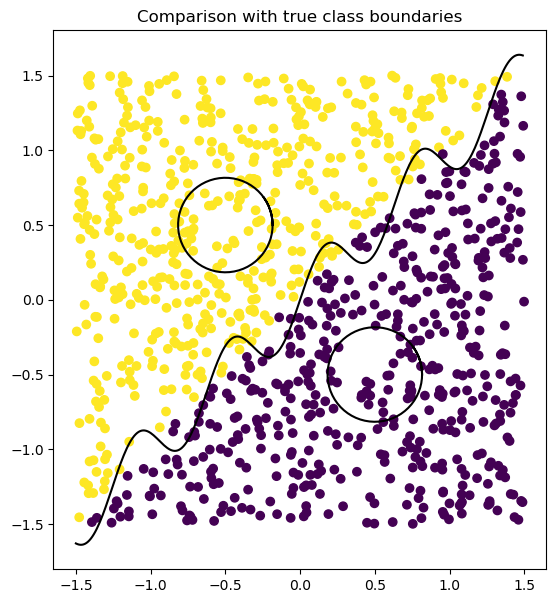

In [15]:
# svm.SVC default settings

# First using support vector machines 
svcClass = SVC(kernel='linear')
svcClass.fit(xyset, classes) 
svcPred = svcClass.predict(xyset)

plt.figure(figsize = (7,7))
comp = evaluateClassification(xyset, svcPred, plt.gca())
print('Score: ', svcClass.score(xyset, classes))

Score:  0.896


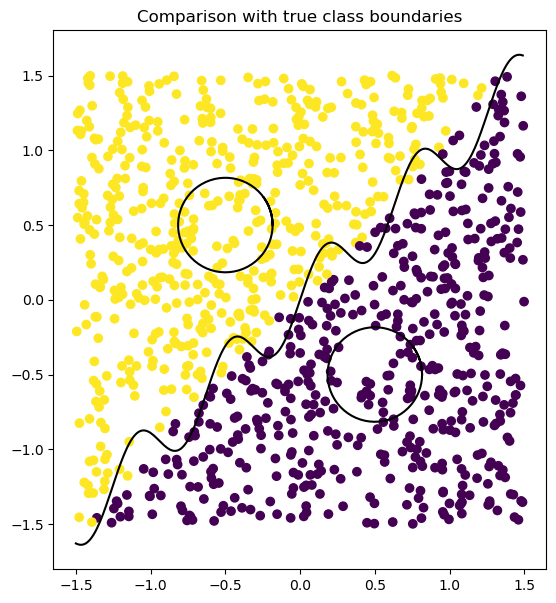

In [16]:
# svm.SVC default settings

svcClass = SVC(gamma='auto')
svcClass.fit(xyset, classes) 
svcPred = svcClass.predict(xyset)

plt.figure(figsize = (7,7))
comp = evaluateClassification(xyset, svcPred, plt.gca())
print('Score: ', svcClass.score(xyset, classes))

Score:  1.0


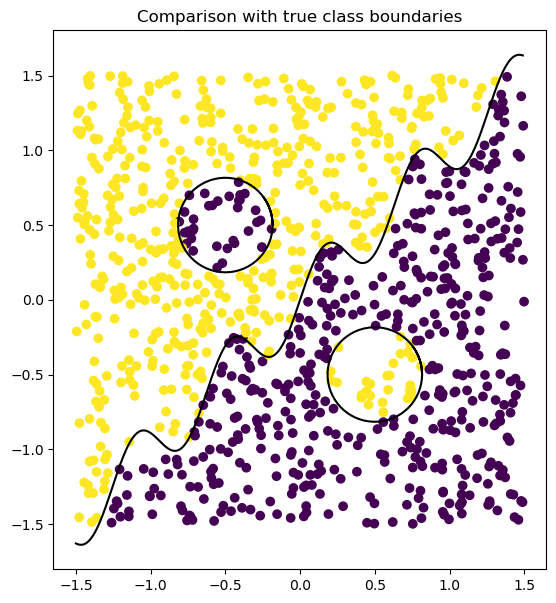

In [17]:
svcClass = SVC(gamma=5000)
svcClass.fit(xyset, classes) 
svcPred = svcClass.predict(xyset)

plt.figure(figsize = (7,7))
comp = evaluateClassification(xyset, svcPred, plt.gca())
print('Score: ', svcClass.score(xyset, classes))

Score train:  0.9946666666666667
Score test:  0.98


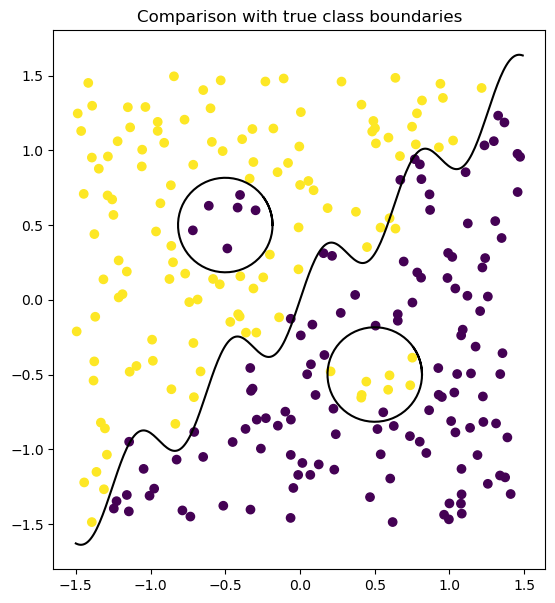

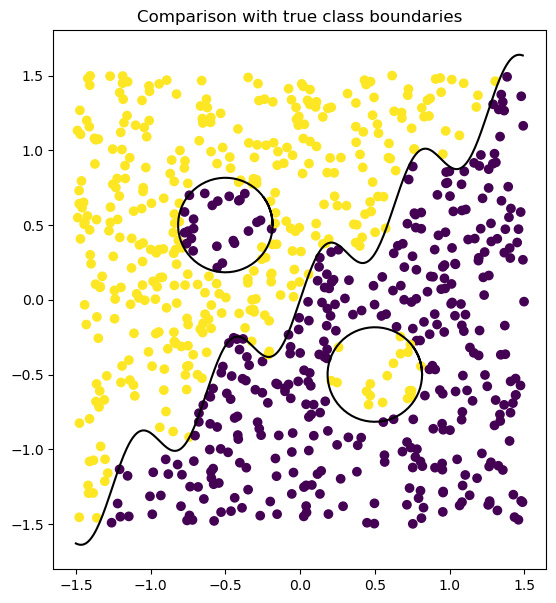

In [18]:
# svm.SVC with large gamma and train_test_split

svcClass = SVC(gamma=96)
svcClass.fit(XY_train, classes_train) 
svcPred_test = svcClass.predict(XY_test)

svcPred_train = svcClass.predict(XY_train)

plt.figure(figsize = (7,7))
comp = evaluateClassification(XY_test, svcPred_test, plt.gca())

plt.figure(figsize = (7,7))
comp = evaluateClassification(XY_train, svcPred_train, plt.gca())

print('Score train: ', svcClass.score(XY_train, classes_train))
print('Score test: ', svcClass.score(XY_test, classes_test))

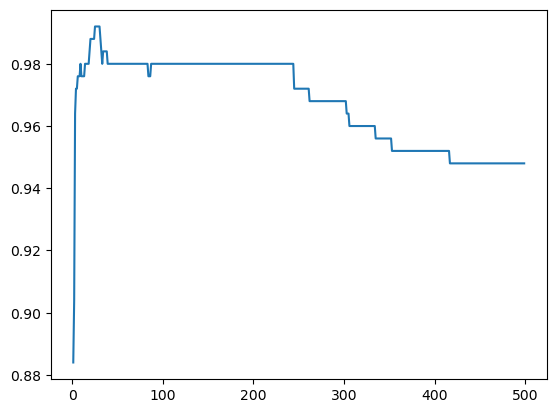

In [19]:
max_gamma=500
scores = np.zeros(max_gamma-1)

for i in range(1,max_gamma):
    svcClass = SVC(gamma=i)
    svcClass.fit(XY_train, classes_train) 
    svcPred = svcClass.predict(XY_test)
    scores[i-1]=svcClass.score(XY_test, classes_test)

plt.plot(range(1,max_gamma),scores)

In [20]:
gamma_opt = scores.argmax()+1
print(gamma_opt)

25


In [23]:
# C sets softness

Score:  1.0


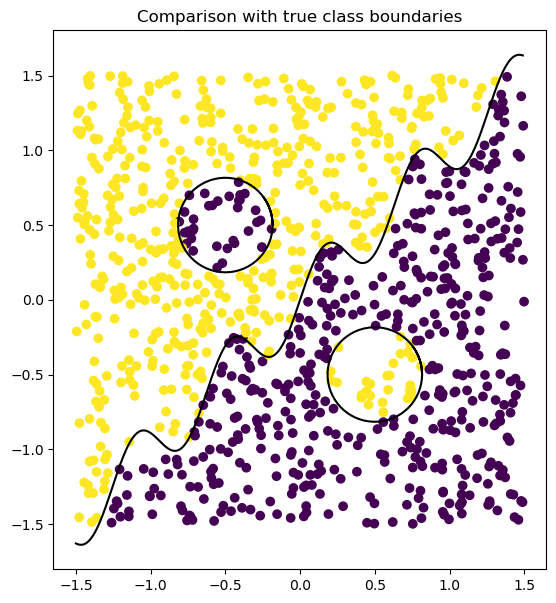

In [21]:
# DecisionTreeClassifier

DecTreeClass = DecisionTreeClassifier(max_depth=20)
DecTreeClass.fit(xyset, classes) 
DecTreePred = DecTreeClass.predict(xyset)

plt.figure(figsize = (7,7))
comp = evaluateClassification(xyset, DecTreePred, plt.gca())
print('Score: ', DecTreeClass.score(xyset, classes))

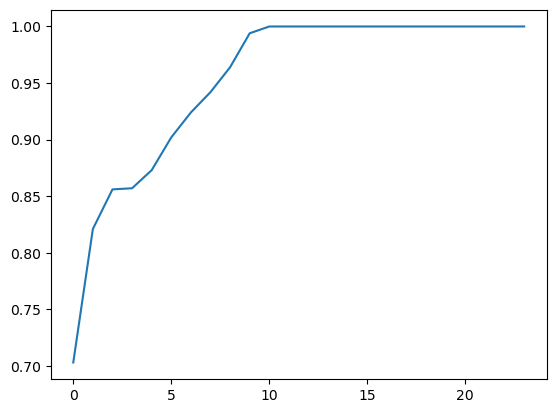

In [22]:
# Save the score
scores = np.array([])

for maxdepth in range(1, 25):
    DecTreeClass = DecisionTreeClassifier(max_depth = maxdepth)
    DecTreeClass.fit(xyset, classes) 
    DecTreePred = DecTreeClass.predict(xyset)
    scores = np.append(scores, DecTreeClass.score(xyset, classes))

_ = plt.plot(scores)

Score:  0.873


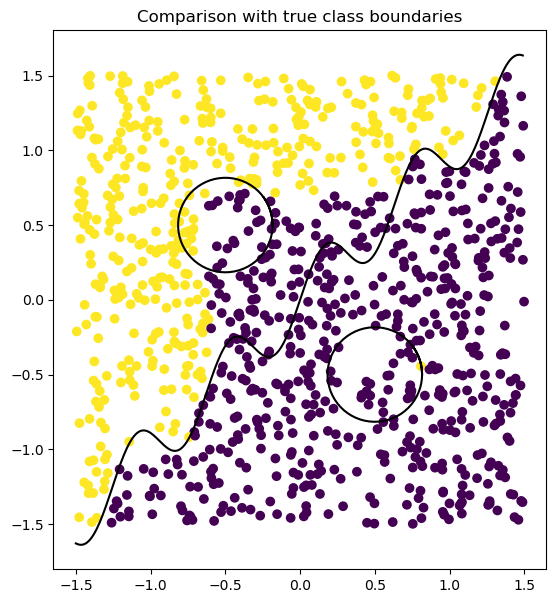

In [23]:
DecTreeClass = DecisionTreeClassifier(max_depth=5)
DecTreeClass.fit(xyset, classes) 
DecTreePred = DecTreeClass.predict(xyset)

plt.figure(figsize = (7,7))
comp = evaluateClassification(xyset, DecTreePred, plt.gca())
print('Score: ', DecTreeClass.score(xyset, classes))

Epoch 1/20
1334/1334 [==============================] - 17s 12ms/step - loss: 1.0795 - accuracy: 0.6518 - val_loss: 0.5278 - val_accuracy: 0.8538
Epoch 2/20
1334/1334 [==============================] - 19s 14ms/step - loss: 0.3922 - accuracy: 0.8905 - val_loss: 0.3611 - val_accuracy: 0.8994
Epoch 3/20
1334/1334 [==============================] - 18s 13ms/step - loss: 0.2713 - accuracy: 0.9241 - val_loss: 0.3049 - val_accuracy: 0.9156
Epoch 4/20
1334/1334 [==============================] - 16s 12ms/step - loss: 0.2114 - accuracy: 0.9404 - val_loss: 0.2703 - val_accuracy: 0.9271
Epoch 5/20
1334/1334 [==============================] - 18s 13ms/step - loss: 0.1732 - accuracy: 0.9510 - val_loss: 0.2710 - val_accuracy: 0.9313
Epoch 6/20
1334/1334 [==============================] - 17s 13ms/step - loss: 0.1403 - accuracy: 0.9607 - val_loss: 0.3016 - val_accuracy: 0.9263
Epoch 7/20
1334/1334 [==============================] - 19s 14ms/step - loss: 0.1258 - accuracy: 0.9651 - val_loss: 0.2585 -

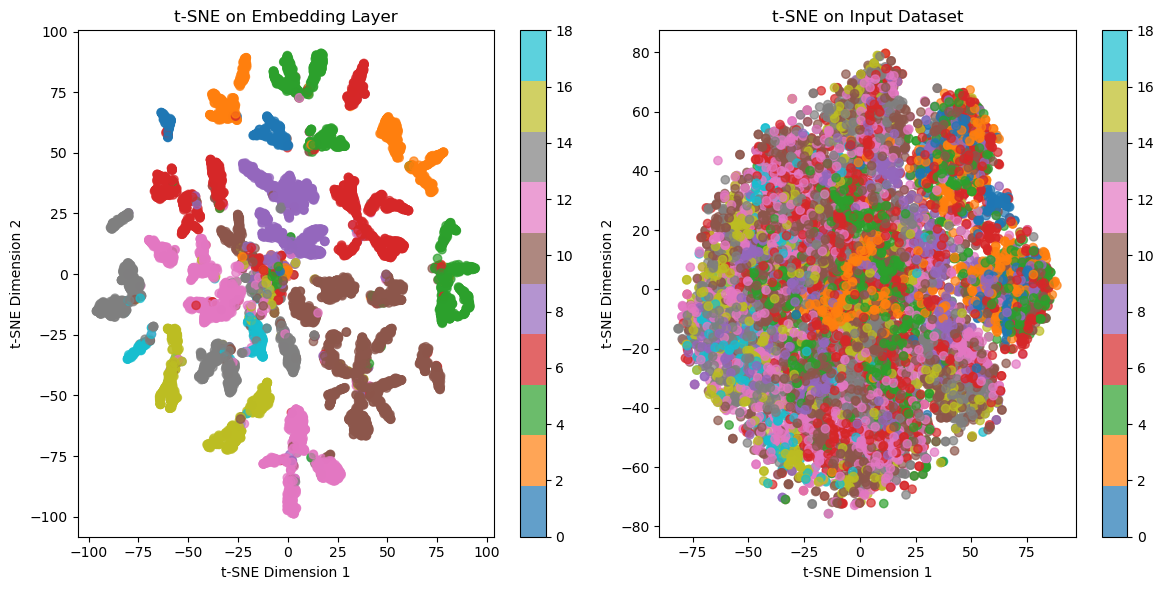

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Model

# Set seeds for reproducibility
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Reproducing the combined dataset
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, axis=-1) / 255.0  # Normalize

combined_images = []
labels = []
num_pairs = 100000  # Adjust as needed
for _ in range(num_pairs):
    idx1 = np.random.randint(0, len(x_train))
    idx2 = np.random.randint(0, len(x_train))

    img1 = tf.image.resize(x_train[idx1], (28, 28))
    img2 = tf.image.resize(x_train[idx2], (28, 28))
    combined_img = tf.concat([img1, img2], axis=-2)

    combined_images.append(combined_img)
    labels.append(y_train[idx1] + y_train[idx2])

combined_images = np.array(combined_images)
labels = np.array(labels)

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(combined_images, labels, test_size=0.2, random_state=SEED)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=SEED)

# Define the best performing neural network
def create_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(28, 56, 1)))
    for _ in range(6):  # Based on the best model
        model.add(tf.keras.layers.Dense(500, activation='relu'))
    model.add(tf.keras.layers.Dense(19, activation='softmax'))  # Output layer
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        metrics=['accuracy']
    )
    return model

# Train the best model
best_model = create_model()
history = best_model.fit(
    X_train, y_train,
    batch_size=60,
    epochs=20,
    validation_data=(X_val, y_val),
    verbose=1
)

# Extract the embedding layer (last Dense layer before the output)
embedding_model = Model(inputs=best_model.input, outputs=best_model.layers[-2].output)
embedding_features = embedding_model.predict(X_test)

# Standardize the embedding features for t-SNE
scaler = StandardScaler()
embedding_features_scaled = scaler.fit_transform(embedding_features)

# Apply t-SNE on the embedding layer
tsne_embedding = TSNE(n_components=2, perplexity=30, random_state=SEED)
embedding_tsne_results = tsne_embedding.fit_transform(embedding_features_scaled)

# Apply t-SNE directly on the input dataset
X_test_flat = X_test.reshape(X_test.shape[0], -1)  # Flatten for t-SNE
tsne_input = TSNE(n_components=2, perplexity=30, random_state=SEED)
input_tsne_results = tsne_input.fit_transform(X_test_flat)

# Plot the t-SNE visualization
plt.figure(figsize=(12, 6))

# t-SNE on the embedding layer
plt.subplot(1, 2, 1)
scatter = plt.scatter(embedding_tsne_results[:, 0], embedding_tsne_results[:, 1], c=y_test, cmap='tab10', alpha=0.7)
plt.colorbar(scatter)
plt.title('t-SNE on Embedding Layer')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

# t-SNE on the input dataset
plt.subplot(1, 2, 2)
scatter = plt.scatter(input_tsne_results[:, 0], input_tsne_results[:, 1], c=y_test, cmap='tab10', alpha=0.7)
plt.colorbar(scatter)
plt.title('t-SNE on Input Dataset')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

plt.tight_layout()
plt.savefig("tSNE_Comparison.png")
plt.show()
